## scipy

In [48]:
# Numerical arrays
import numpy as np

# Scientific Comuting
import scipy as sp

# Plotting
import matplotlib.pyplot as plt 

## Resources

https://docs.scipy.org/doc/scipy/tutorial/index.html

## Fit a line   

In [49]:
# Range of x values
x = np.linspace(-10.0, 10.0, 21)

# Range of y values
y = 4.0 * x + 2.0 + np.random.normal(0.0, 3.0, x.shape)

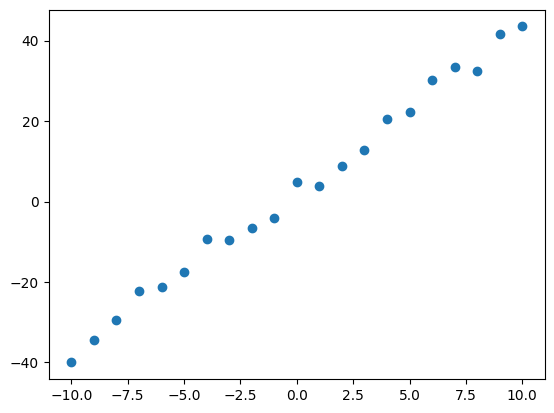

In [50]:
# Plot x, y
plt.plot(x, y, 'o', label='Data')

In [51]:
# Fit a line
m, c = np.polyfit(x, y, 1)

# Show 
m, c

(np.float64(4.075704812407498), np.float64(2.8685720848717327))

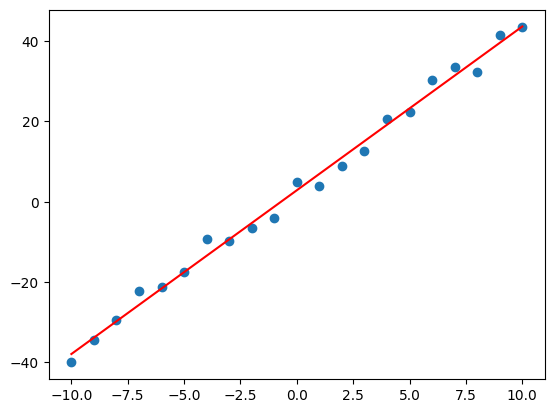

In [52]:
# Plot x and y
plt.plot(x, y, 'o', label='Data')

# Plot the line 
plt.plot(x, m * x + c, 'r', label='Fit')

In [53]:
# Fit a line
# coeffs shows the same values as m, c, but just as a single array
coeffs = np.polyfit(x, y, 1)

# Show 
# m would be coeffs[0]
# c would be coeffs[1]
coeffs

array([4.07570481, 2.86857208])

In [54]:
# Evaluate the polynomial
# This evaluates m, c for us
# It multiplies the coeffs by the x values
# What it does is: calculates what the y value of x would be on the line (vs the actual y value that is outside the line)
f = np.polyval(coeffs, x)

# Show y
f

array([-37.88847604, -33.81277123, -29.73706641, -25.6613616 ,
       -21.58565679, -17.50995198, -13.43424716,  -9.35854235,
        -5.28283754,  -1.20713273,   2.86857208,   6.9442769 ,
        11.01998171,  15.09568652,  19.17139133,  23.24709615,
        27.32280096,  31.39850577,  35.47421058,  39.5499154 ,
        43.62562021])

In [55]:
# Show y
y

array([-39.99634749, -34.36391567, -29.47534962, -22.27836694,
       -21.22287549, -17.53836262,  -9.21699196,  -9.64133228,
        -6.58324606,  -4.1165629 ,   4.86608813,   3.91124482,
         8.9070956 ,  12.69419768,  20.61938226,  22.35049688,
        30.25287944,  33.55621538,  32.39529312,  41.61734861,
        43.50312291])

If we compare the two arrays above, for points that are closer to the line the diff between f and y corresponding values would be small. For values that are further away from the line the diff will be larger because f is a representation of y if it was on the line

## Evaluate
https://en.wikipedia.org/wiki/Coefficient_of_determination

$R^2$ tells us how much of y is explained by x variable. You are aiming for a lot of y to be explained by x. An in real world it is the case that mainly x (~80%) affecting y

## Using maual approach 

In [56]:
# Sum of square residuals
# This is the sum of the squares of the differences between the y values and the fitted line
ss_res = np.sum((y - f)** 2)

# Show 
ss_res

np.float64(97.74495352699611)

In [57]:
# Mean of y
y_bar = np.mean(y)

# Show 
y_bar

np.float64(2.8685720848717327)

In [58]:
# Total sum of squares
ss_tot = np.sum((y - y_bar)** 2)

# Show
ss_tot

np.float64(12888.49963629585)

In [ ]:
# Ratio
# How much variation in the blue points from the y points is down to a bad fit
ss_res / ss_tot

np.float64(0.007583889225688645)

$R^2$ value calculation using manual approach

In [61]:
# R^2 value
# How good is the fit - very good in this case as it's close to 1
1.0 - (ss_res / ss_tot)

np.float64(0.9924161107743114)

## Using scipy
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [63]:
# Using scipy to fit the line
fit = sp.stats.linregress(x, y)

# Show
fit

LinregressResult(slope=np.float64(4.075704812407496), intercept=np.float64(2.8685720848717327), rvalue=np.float64(0.9962008385733825), pvalue=np.float64(1.3101484109838741e-21), stderr=np.float64(0.08173818861624205), intercept_stderr=np.float64(0.4949493114145056))

In [64]:
# Slope
fit.slope

np.float64(4.075704812407496)

In [65]:
# Intercept
fit.intercept

np.float64(2.8685720848717327)

In [66]:
# R value (note, this is not the same as R^2)
fit.rvalue

np.float64(0.9962008385733825)

$R^2$ value calculation using scipy 

In [67]:
# R^2 value
fit.rvalue ** 2

np.float64(0.9924161107743105)